# Finding the Best Markets to Advertise In
This is a guided project part of the Dataquest.io Data Scientist courses. The primary goal is to supplement the lessons from the course with a hands-on project. The topics covers intermediate statics including how to summarise distributions, measuring the variability of distributions, and finally how to normalise distributions using the z-score in order to compare different distributions.

In this project, we are looking to use these techniques in order to help a fictional company determine what markets they should invest their advertising dollars in.

In [58]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

data = pd.read_csv('data/2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

data.head(5)
data.shape

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(18175, 136)

## About the Data
The data from the freeCodeCamp New Coder Survey. We are using this because Dataquest.io told us to. On a more serious note, the pratical reasons for using this data is because it takes a lot of time and money to conduct a survey. Gathering data is a large effort on its own and is beyond the scope of this course.

The New Coder Survey asks respondants how they are learning how to code. The defintion of a new coder in this survey is someone who has been coding for less than five years. There were over 31,000 responses to the survey.

The dataset is available on the following Github repository: https://github.com/freeCodeCamp/2017-new-coder-survey

## Is This Data Representative?

Does this survey data that is relevant to the answers we are trying to find? Here what we are trying to find out:
- Where are thes new coders located?
- What are the locations with the greatest number of new coders
- How much money new coders are willing to spend on learning

There are 132 columns. Pandas seems to truncate any lists that are too long. By using `Dataframe.columns` and converting that to a Python list, we are able to see all of the columns. From there, identifying the columns is a matter of scanning through the output. Let's list out some of the columns in no particular order
- BootcampLoanYesNo
- CityPopulation
- CountryCitizen
- CountryLive
- ExpectedEarning
- FinanciallSupprting
- HasDebt
- MoneyForLearning

In [59]:
data.columns.values.tolist()

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampLoanYesNo',
 'BootcampName',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventWorkshops',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'FirstDevJob',
 'Gender',
 'GenderOther',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits'

In [60]:
data["CountryLive"].value_counts().shape
data["MoneyForLearning"].tail()

(172,)

18170       10.0
18171    10000.0
18172       19.0
18173        0.0
18174        NaN
Name: MoneyForLearning, dtype: float64

The two key columns are _CountryLive_ and _MoneyForLearning_. These two columns are likely the key columns to answer the question. The other columns listed may help us provide more depth in answering the questions.

In [61]:
data["JobRoleInterest"].value_counts(normalize=True)

Full-Stack Web Developer                                                                                                                                                                                                                 0.117706
  Front-End Web Developer                                                                                                                                                                                                                0.064359
  Data Scientist                                                                                                                                                                                                                         0.021739
Back-End Web Developer                                                                                                                                                                                                                   0.020309
  Mobile Developer              

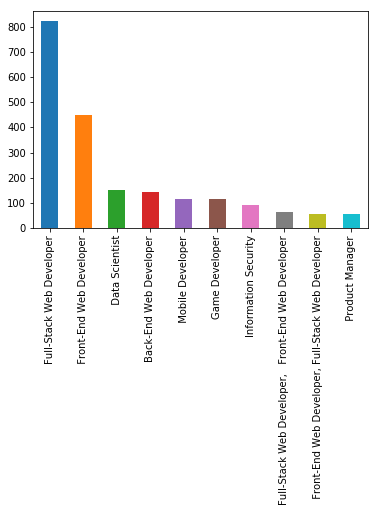

In [62]:
data["JobRoleInterest"].value_counts().head(10).plot.bar()

<BarContainer object of 2 artists>

([<matplotlib.axis.XTick at 0x7ffa6ed513c8>,
 <a list of 2 Text xticklabel objects>)

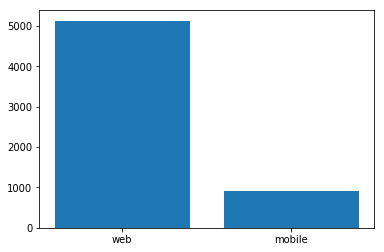

In [63]:
interest = {}
count_interest = data["JobRoleInterest"].str.extract('([Ww]eb)|([Mm]obile)')

interest["web"] = count_interest[0].count()
interest["mobile"] = count_interest[1].count()
#interest["both"] = count_interest[0].count() + count_interest[1].count()

plt.bar(x=range(len(interest)), height=list(interest.values()))
plt.xticks(range(len(interest)), list(interest.keys()))

### How many people are interested in Web or Mobile Development
We want to focus on just the respondants who are interested in web or mobile development. We use a str.extract function to look for any answers that contain _web_ or _mobile_. The extract function in Pandas let's us use a regex with grouping and returns T/F for each grouping. This allows us to get a quick count.

Finally, we store the results in a dictionary and drop a basic bar chart. We show about 6000 in this sample that are interested in either web or mobile development.

Note that there could be other categories that could fit into eithe category. However, we are only trying to make sure we have enough responses to do our analysis at this point.

In [64]:
# remove rows where the column mentioned is empoty

data = data[data["JobRoleInterest"].notnull()]
# Note that this removes about 12k rows from our data....

In [65]:
data["CountryLive"].value_counts().head(20)

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Serbia                             52
Philippines                        52
Greece                             46
Ireland                            43
Name: CountryLive, dtype: int64

In [10]:
data["CountryLive"].value_counts(normalize=True).head(20)

United States of America         0.457005
India                            0.077216
United Kingdom                   0.046066
Canada                           0.038023
Poland                           0.019158
Brazil                           0.018865
Germany                          0.018280
Australia                        0.016379
Russia                           0.014917
Ukraine                          0.013016
Nigeria                          0.012284
Spain                            0.011261
France                           0.010968
Romania                          0.010383
Netherlands (Holland, Europe)    0.009506
Italy                            0.009067
Serbia                           0.007605
Philippines                      0.007605
Greece                           0.006727
Ireland                          0.006288
Name: CountryLive, dtype: float64

### Where are the Respondants From?
Generating frequency tables for the _CountryLive_ column reveals that a vast majority are from the USA. Because the USA represents such a large amount, it is probably too big to ignore and will be a target anyway. The following countries in order are India, UK, Canada, and Poland.

Based on the analysis of these quick results, the two markets I would choose to advertise would be the USA and either the UK or Canada. There are several reasons why I decided to skip India,
- Wealth/GDP. We have not looked at the money spent on education column. This will be an important measure. India in general is also a poorer country and is still classified as a developing nation. There may not be as many potential students there that are willing or have the resources to pay extra for training.
- Language. The top four countries all speak English. Language is an important consideration when considering advertising campaigns. There is a LanguageAtHome column in the dataset that we can analyze if needed. This may not be as important consideration with the top four countries all speaking English.
- Cultural barriers. This is harder to measure, but there could be other unknown cultural and local considerations when advertising. 

In [67]:
# remove null/na values 
data["money_for_learning_per_month"] = data["MoneyForLearning"]/(data["MonthsProgramming"].replace(0,1))

count_na = data[data["money_for_learning_per_month"].isna()]
count_na.shape

# the subset argument allows us to only drop rows if the columns in the list are included
data = data.dropna(axis=0, subset=['money_for_learning_per_month', 'CountryLive'])

(0, 137)

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

In [51]:
top_spend_per_month = data.groupby(["CountryLive"])["money_for_learning_per_month"].mean().sort_values(ascending=False)

top_four = ["United States of America","United Kingdom","India","Canada"]
top_spend_per_month.head(20)
top_spend_per_month.loc[top_four]

CountryLive
Yemen                10000.000000
Puerto Rico           4291.394558
Austria                936.208333
Spain                  784.553084
Jamaica                747.037037
Hong Kong              523.341049
Trinidad & Tobago      500.000000
Australia              419.268452
Taiwan                 417.966524
Luxembourg             338.817664
Norway                 318.914815
New Zealand            316.171958
Chile                  300.416667
Israel                 298.130787
Russia                 284.615280
Portugal               277.752763
Uganda                 276.620370
Vietnam                243.324074
Bangladesh             239.361883
Niger                  239.303571
Name: money_for_learning_per_month, dtype: float64

CountryLive
United States of America    227.997996
United Kingdom               45.534443
India                       135.100982
Canada                      113.510961
Name: money_for_learning_per_month, dtype: float64

array(['United States of America', 'Brazil', 'Portugal', 'United Kingdom',
       'Mexico', 'Germany', 'Italy', 'Argentina', 'Venezuela', 'India',
       'Canada', 'Australia', 'Egypt', 'Lithuania', nan, 'Finland',
       'Bosnia & Herzegovina', 'Netherlands (Holland, Europe)', 'Kenya',
       'Switzerland', 'Hungary', 'Turkey', 'Poland', 'Great Britain',
       'Russia', 'China', 'Spain', 'Ireland', 'France', 'Nigeria', 'Iran',
       'Kyrgyzstan', 'Greece', 'Philippines', 'Georgia', 'Romania',
       'Norway', 'Peru', 'Iraq', 'Sweden', 'Bulgaria', 'Singapore',
       'Ukraine', 'Austria', 'New Zealand', 'Serbia', 'Bangladesh',
       'Belgium', 'Honduras', 'Puerto Rico', 'Denmark', 'Japan', 'Cyprus',
       'Ghana', 'Czech Republic', 'Macedonia', 'Costa Rica', 'Tunisia',
       'Chile', 'South Africa', 'Albania', 'Malaysia', 'Thailand',
       'Iceland', 'Pakistan', 'Guam', 'Indonesia', 'Algeria', 'Senegal',
       'Belarus', 'Sri Lanka', 'Israel', 'United Arab Emirates',
       'Vir

### How Much are the Top Countries Spending per Month?
The main surprises here come from how India spends more per money on training compared to the UK and Canada. You would not really expect that as the average resident there has less income in general.

We will do further analysis by creating a box plot of the amount spent per month for the top four countries.

([<matplotlib.axis.XTick at 0x7ffa6cddfa20>,
 <a list of 4 Text xticklabel objects>)

Text(0.5, 0, 'Country')

Text(0, 0.5, 'Money Spent Per Month (USD)')

Text(0.5, 1.0, 'Money Spent Per Month Per Country')

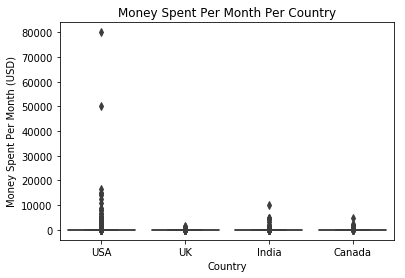

In [68]:
top_four_spending = data[data["CountryLive"].str.contains('United States of America|United Kingdom|India|Canada')]

sns.boxplot(x="CountryLive", y="money_for_learning_per_month", data=top_four_spending)
plt.xticks(range(4), ["USA", "UK", "India", "Canada"])
plt.xlabel("Country")
plt.ylabel("Money Spent Per Month (USD)")
plt.title("Money Spent Per Month Per Country")

We can immediately see some extreme values from the USA. It's hard to imagine any type of training costing $50k or more in a single month. 

CountryLive
United States of America    183.800110
United Kingdom               45.534443
India                       135.100982
Canada                      113.510961
Name: money_for_learning_per_month, dtype: float64

([<matplotlib.axis.XTick at 0x7ffa6c4260f0>,
 <a list of 4 Text xticklabel objects>)

Text(0.5, 0, 'Country')

Text(0, 0.5, 'Money Spent Per Month (USD)')

Text(0.5, 1.0, 'Money Spent Per Month Per Country')

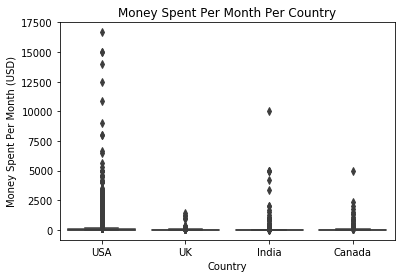

In [71]:
data_f = data[data["money_for_learning_per_month"] < 20000]

data_f.groupby("CountryLive").mean()["money_for_learning_per_month"][top_four]

top_four_spending = data_f[data_f["CountryLive"].str.contains('United States of America|United Kingdom|India|Canada')]
sns.boxplot(x="CountryLive", y="money_for_learning_per_month", data=top_four_spending)
plt.xticks(range(4), ["USA", "UK", "India", "Canada"])
plt.xlabel("Country")
plt.ylabel("Money Spent Per Month (USD)")
plt.title("Money Spent Per Month Per Country")

Okay, great. The numbers look better. There still some people spending an absurb amount of money per month, but the values overall seem more reasonable. The high amounts of spending leftover could be explained by people who spent on bootcamps, which can get very expensive.

### Choosing the Second Market
It appears to be clear that the USA is the key market to focus in, based on both number of people and the amount that people are willing to spend. Choosing the second market may not be clear cut.

Remember that the original goal of this project is to find the best market to advertise in. The fictional company we doing this research for sells subscriptions for $59 per month. The averages we computed earlier show the average amount people are willing to spend that are _new_ coders. Let's further eliminate the not-as-extreme outliers and see what the numbers look like. There are several other reason to remove these bootcamps from the sample. The data we'll remove are:


CountryLive
United States of America    130.639017
United Kingdom               45.534443
India                        81.812102
Canada                       93.065400
Name: money_for_learning_per_month, dtype: float64

([<matplotlib.axis.XTick at 0x7ffa6c29a550>,
 <a list of 4 Text xticklabel objects>)

Text(0.5, 0, 'Country')

Text(0, 0.5, 'Money Spent Per Month (USD)')

Text(0.5, 1.0, 'Money Spent Per Month Per Country')

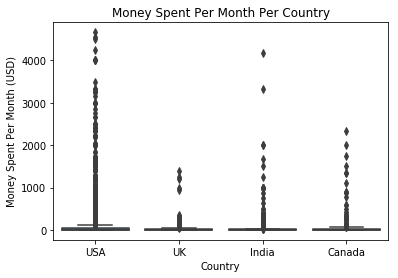

In [74]:
data_lt5k = data[data["money_for_learning_per_month"] < 5000]

data_lt5k.groupby("CountryLive").mean()["money_for_learning_per_month"][top_four]

top_four_spending_lt5k = data_lt5k[data_lt5k["CountryLive"].str.contains('United States of America|United Kingdom|India|Canada')]
sns.boxplot(x="CountryLive", y="money_for_learning_per_month", data=top_four_spending_lt5k)
plt.xticks(range(4), ["USA", "UK", "India", "Canada"])
plt.xlabel("Country")
plt.ylabel("Money Spent Per Month (USD)")
plt.title("Money Spent Per Month Per Country")

Further lowering the limit for monthly spending, we actually end up with the monthly spend for Canada slightly higher than India. However, the difference between the two is still low, and well above our $59/month subscription price.

We can safely eliminate the UK as the average was barely impacted by removing outliers. The average monthly spending on coding is less than our monthly subscription fee and there will likely be more customers there who will decide not to opt into the fee.

There are definitely upsides to advertising in countries outside the USA, but it is also feasible to advertise only within the USA. As for the second market, India presents a large population, and the data suggests that they are almost as willing to spend on training. Canada has a much smaller population, but on average have more wealthy residents and have a culture much more similar to that of the USA.

At this point in the analysis, we are probably ready to present the marketing team the results of this research. From there they may have additional requests based on what they find, or perhaps they may decide that these results are enough and make a decision from there.